In [1]:
import h5py
import numpy as np
import math
import scipy
import pywt
from scipy import signal
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline as spline
from scipy.fftpack import fft, fftshift ,ifft,rfft,fftfreq,rfftfreq
c=2.9979e10
G=6.67408e-8
Msun=1.989e33
Length = G*Msun/c**2
Time = Length/c
Frequency=1/Time

In [2]:
EOS=['15H','125H','H','HB','B']
MASS=['135_135','125_146','125_125','121_151','118_155','117_156','116_158','112_140','107_146']
eq=['135_135','125_125']

Define functions to calculate different expected frequencies

For $q=1$

In [3]:
def f20(M,R6):
    return 8.943+4.059*M-1.332*R6-.358*(M**2)-.182*R6*M+.048*(R6**2)

In [4]:
def fspir(M,R8):
    return 6.264+1.929*M-.645*R8+.881*(M**2)-.311*R8*M+.03*(R8**2)

In [5]:
def fpeak(M,R6):
    return 13.822-0.576*M-1.375*R6+.479*(M**2)-.073*R6*M+.044*(R6**2)

For all cases

In [6]:
def f20_a(M,R6):
    return 9.586+4.09*M-1.427*R6+.048*(M**2)-.261*R6*M+.055*(R6**2)

In [7]:
def fspir_a(M,R8):
    return 5.846+1.75*M-.555*R8+1.002*(M**2)-.316*R8*M+.026*(R8**2)

In [8]:
def fpeak_a(M,R8):
    return 10.942-.369*M-.987*R8+1.095*(M**2)-.201*R8*M+.036*(R8**2)

Define functions for the FFT and the analysis

In [9]:
def fre_do(x,y,mass):
    fd=fft(y)
    N=len(y)
    if (N % 2) == 1:
        N=N+1
    T=x[1]-x[0]
    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
    fq=fftfreq(len(y))
    mask=fq>=0
    fd=2.0*(fd/N)
    fd=fd[mask]
    fd=abs(fd)
    return xf,fd
    

In [10]:
def analyze(rhM,time,mass):
    
    
    
    peaks,prop=scipy.signal.find_peaks(abs(rhM))
    ampls=rhM[peaks]
    merg=np.amax(abs(ampls))
    merg=np.where(abs(ampls)==merg)
    merg=int(merg[0])
    t0=peaks[merg]
    
    ampl=rhM[t0:]
    tim=time[t0:]
    
    #ampl=rhM
    #tim=time
    
    tuk=signal.tukey(len(ampl),0.03)
    dat=ampl*tuk
    
    fq,fd=fre_do(tim,dat,mass)
    
    mx=np.where(fd==np.amax(fd))[0][0]
    freq=fq[mx]
    amp=fd[mx]
    
    return fq,fd,tim,dat
    

Find the $R_{1.6}$ , $R_{1.8}$ for every binary 

In [11]:
m_r1=np.load('tid_def/15H.npy')
m_r2=np.load('tid_def/125H.npy')
m_r3=np.load('tid_def/H.npy')
m_r4=np.load('tid_def/HB.npy')
m_r5=np.load('tid_def/B.npy')

In [12]:
mx=np.amax(m_r1[0])
idx=np.where(m_r1[0]==mx)
idx=idx[0][0]
#cs1=spline(m_r1[0][1:idx],k_l1[0][1:idx])
cs11=spline(m_r1[0][1:idx],m_r1[1][1:idx])

mx=np.amax(m_r2[0])
idx=np.where(m_r2[0]==mx)
idx=idx[0][0]
#cs2=spline(m_r2[0][1:idx],k_l2[0][1:idx])
cs21=spline(m_r2[0][1:idx],m_r2[1][1:idx])

mx=np.amax(m_r3[0])
idx=np.where(m_r3[0]==mx)
idx=idx[0][0]
#cs3=spline(m_r3[0][1:idx],k_l3[0][1:idx])
cs31=spline(m_r3[0][1:idx],m_r3[1][1:idx])

mx=np.amax(m_r4[0])
idx=np.where(m_r4[0]==mx)
idx=idx[0][0]
#cs4=spline(m_r4[0][1:idx],k_l4[0][1:idx])
cs41=spline(m_r4[0][1:idx],m_r4[1][1:idx])

mx=np.amax(m_r5[0])
idx=np.where(m_r5[0]==mx)
idx=idx[0][0]
#cs5=spline(m_r5[0][1:idx],k_l5[0][1:idx])
cs51=spline(m_r5[0][1:idx],m_r5[1][1:idx])



In [13]:
r68=np.zeros((len(EOS),2))
i=0
for eos in EOS:
    if eos=='15H':
        r68[i,0]=cs11(1.6)*Length/1.0e5
        r68[i,1]=cs11(1.8)*Length/1.0e5
        
    elif eos=='125H':
        r68[i,0]=cs21(1.6)*Length/1.0e5
        r68[i,1]=cs21(1.8)*Length/1.0e5
    elif eos=='H':
        r68[i,0]=cs31(1.6)*Length/1.0e5
        r68[i,1]=cs31(1.8)*Length/1.0e5
        
    elif eos=='HB':
        r68[i,0]=cs41(1.6)*Length/1.0e5
        r68[i,1]=cs41(1.8)*Length/1.0e5
        
    elif eos=='B':
        r68[i,0]=cs51(1.6)*Length/1.0e5
        r68[i,1]=cs51(1.8)*Length/1.0e5
        
    i=i+1

Example of the analysis

Get the data in arrays

In [14]:
f=open('data/15H_135_135','r')
lines=f.readlines()
result1=[]
result2=[]
for x in lines:
    for i in range(len(x.split(' '))):
        if x.split(' ')[i]!='':
            result1.append(x.split(' ')[i])
            for j in range(i+1,len(x.split(' '))): 
                if x.split(' ')[j]!='':
                    result2.append(x.split(' ')[j])
                    break
            break
        
    


In [15]:
time=np.zeros(len(result1))
strain=np.zeros(len(result1))
for i in range(len(result1)):

    time[i]=float(result1[i])
    strain[i]=float(result2[i])
print(i)    
    

64584


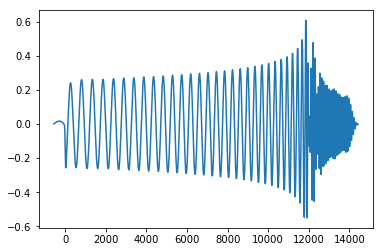

In [16]:
plt.plot(time,strain)
plt.show()

Do the analysis

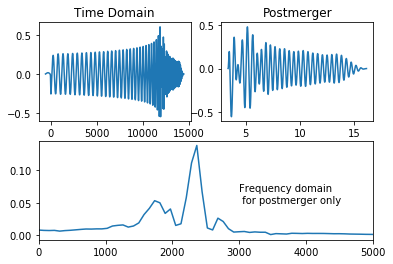

In [21]:
freq2,amp2,tim,post=analyze(strain,time,2.7)
#print(freq2)
plt.subplot(212)
plt.plot((freq2*Frequency),amp2)
plt.xlim(0,5000)
plt.text(3000,0.05,'Frequency domain \n for postmerger only')
plt.subplot(222)
plt.plot(tim*Time*1000-55,post)
plt.title('Postmerger')
plt.subplot(221)
plt.plot(time,strain)
plt.title('Time Domain')
plt.show()

In [27]:
(tim[1]-tim[0])*Time*1000

0.0011430434772869787

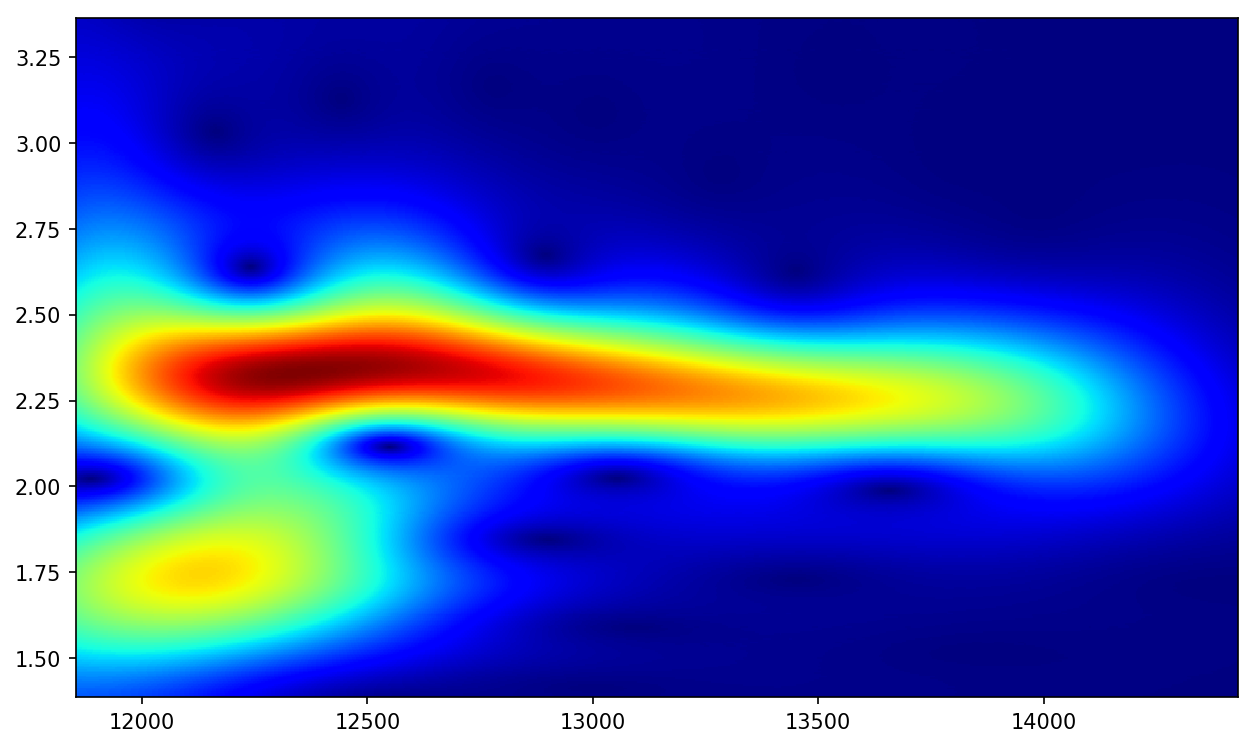

In [28]:
# Parameters (freqs in kHz)
fc =2.4                                                                   #Μπορείς να κανεις απο πριν ενα Fourier και να βρεις την κεντρική συχνότητα ή να δώσεις μια αντιπροσωπευτική για το σύστημα και τις διάφορες καταστατικές
dt=(tim[1]-tim[0])*Time*1000
band = 2.5                                                                    #Κι εδώ μπορείς να παίξεις μέχρι να βρεις κατι που σου αρέσει
wavelet = 'cmor'+str(band)+'-'+str(fc)                        #Χρησιμοποιώ complex Morlet wavelets
widths = fc/np.linspace(fc-1.0, fc+1.0, 400)/dt        #Αυτό είναι κατι που κανω εγώ για να έχεις ομοιομορφα κατανεμημένες συχνότητες στη βάση σου. Έτσι έχεις 400 wavelets με συχνότητες απο fc-1 εως fc+1 με σταθερό Δf.
# Spectrogram
cwtmatr, freqs = pywt.cwt(post, widths, wavelet, dt)    #x->signal, dt->sampling step
power = abs(cwtmatr)
# Plot
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
ax.pcolormesh(tim, freqs, power,cmap='jet')
plt.show()

Do the analysis for $q=1$ cases

/home/jannis/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


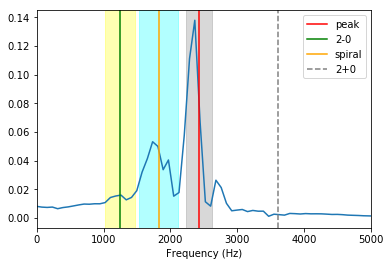

15H_135_135 2.7


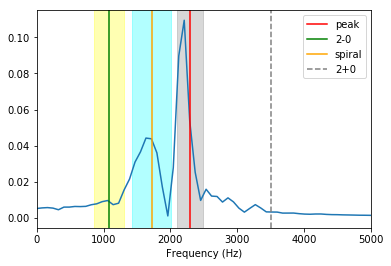

15H_125_125 2.5


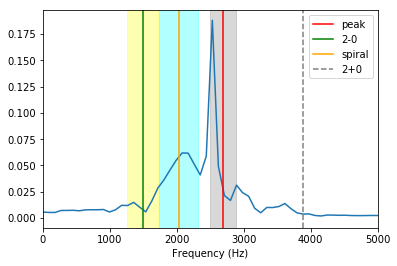

125H_135_135 2.7


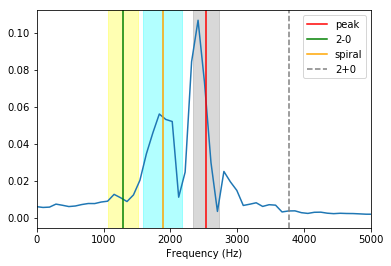

125H_125_125 2.5


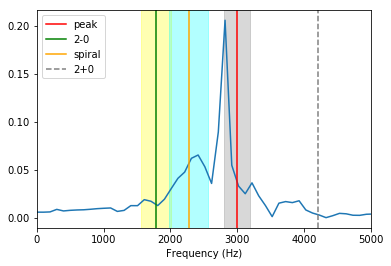

H_135_135 2.7


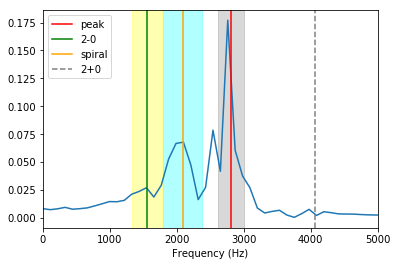

H_125_125 2.5


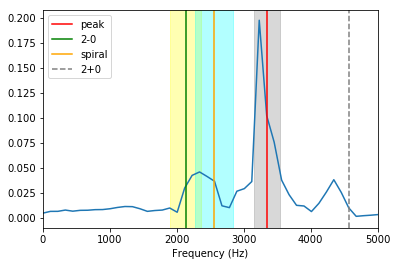

HB_135_135 2.7


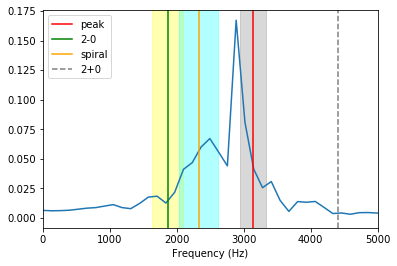

HB_125_125 2.5


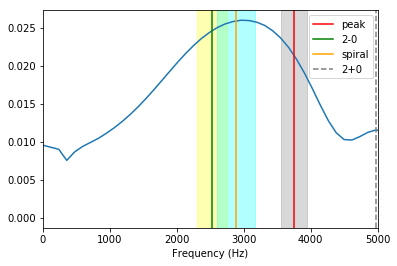

B_135_135 2.7


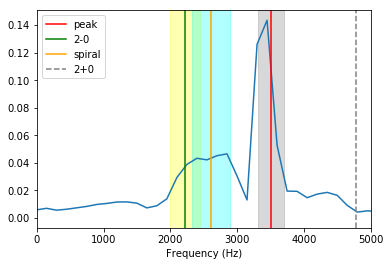

B_125_125 2.5


In [18]:
for eos in EOS:
        if eos=='15H':
            nmb=1
        elif eos=='125H':
            nmb=2
        elif eos=='H':
            nmb=3
        elif eos=='HB':
            nmb=4
        elif eos=='B':
            nmb=5
        for mas in eq:
                        
            f=open('data/'+eos+'_'+mas,'r')
            lines=f.readlines()
            result1=[]
            result2=[]
            for x in lines:
                for i in range(len(x.split(' '))):
                    if x.split(' ')[i]!='':
                        result1.append(x.split(' ')[i])
                        for j in range(i+1,len(x.split(' '))): 
                            if x.split(' ')[j]!='':
                                result2.append(x.split(' ')[j])
                                break
                        break
        
            time=np.zeros(len(result1))
            strain=np.zeros(len(result1))
            for i in range(len(result1)):
                time[i]=float(result1[i])
                strain[i]=float(result2[i])
            
            
            mas1=float(mas.split('_')[0])/100
            mas2=float(mas.split('_')[1])/100
            mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
            q=mas1/mas2
            Mc=pow(q/pow(1+q,2),3/5)*mastot
            
            
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            f_2=f20(Mc,r68[nmb-1,0])    
            f_s=fspir(Mc,r68[nmb-1,1])
            f_p=fpeak(Mc,r68[nmb-1,0])
            f_0=2*f_p-f_2
            #print(f_2,f_s,f_p)
            
            
            #plt.subplot(212)
            
            
            
            plt.plot((freq2*Frequency),amp2)
            
            ax=plt.subplot()
            ax.axvline(x=(f_p*Mc)*1000,color='r',label='peak')
            ax.axvspan((f_p*Mc)*1000-196, (f_p*Mc)*1000+196, alpha=0.3, color='grey')
            ax.axvline(x=(f_2*Mc)*1000,color='g',label='2-0')
            ax.axvspan((f_2*Mc)*1000-229, (f_2*Mc)*1000+229, alpha=0.3, color='yellow')
            ax.axvline((f_s*Mc)*1000,color='orange',label='spiral') 
            ax.axvspan((f_s*Mc)*1000-286, (f_s*Mc)*1000+286, alpha=0.3, color='cyan')
            ax.axvline((f_0*Mc)*1000,linestyle="--",color='grey',label='2+0') 
            plt.legend()
            plt.xlim(0,5000)
            plt.xlabel('Frequency (Hz)')
            #plt.legend(['Postmerger only'])
            
            #plt.subplot(222)
            #plt.plot(tim,post)
            #plt.title('Postmerger')
            #plt.subplot(221)
            #plt.plot(time,strain)
            #plt.title('Time Domain')
            plt.show()
            print(eos+'_'+mas,mastot)
 
        

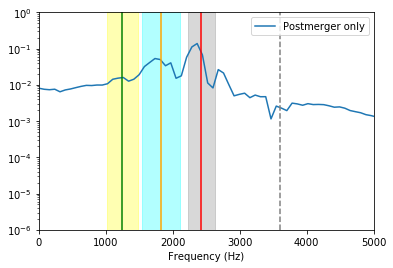

15H_135_135 2.7


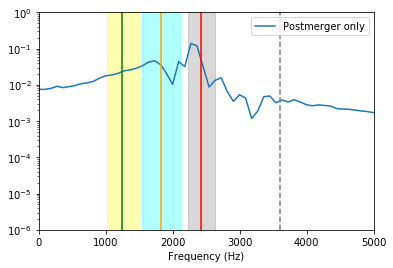

15H_125_146 2.71


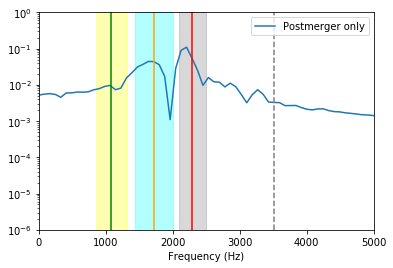

15H_125_125 2.5


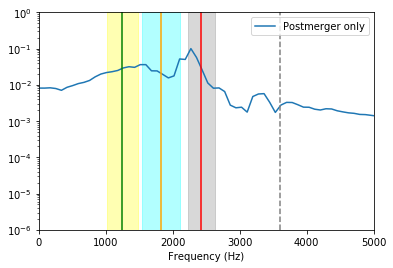

15H_121_151 2.7199999999999998


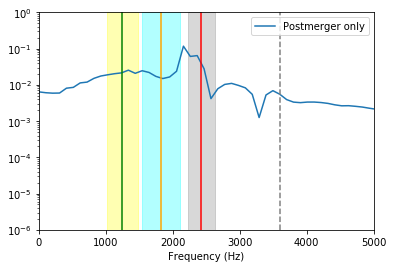

15H_118_155 2.73


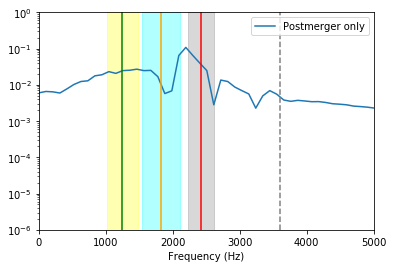

15H_117_156 2.73


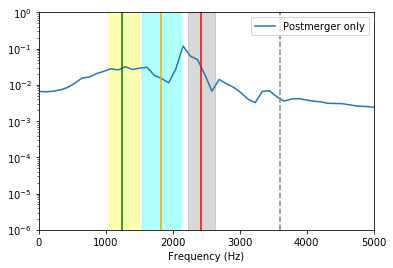

15H_116_158 2.74


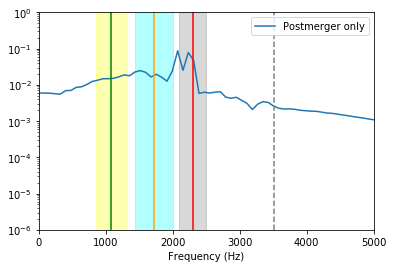

15H_112_140 2.52


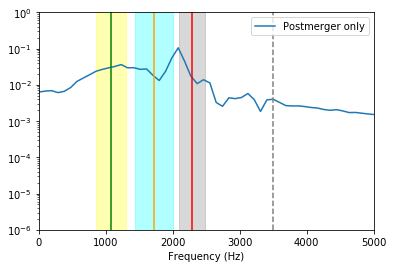

15H_107_146 2.5300000000000002


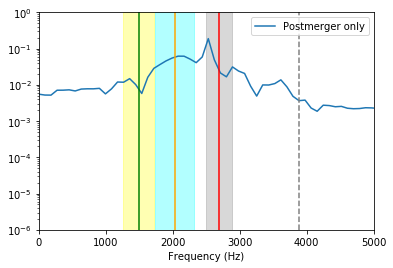

125H_135_135 2.7


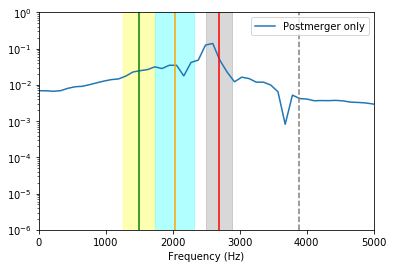

125H_125_146 2.71


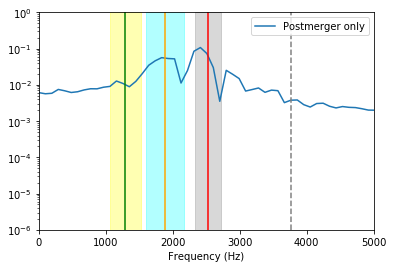

125H_125_125 2.5


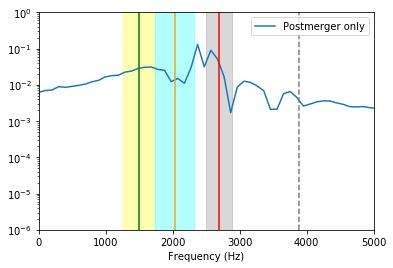

125H_121_151 2.7199999999999998


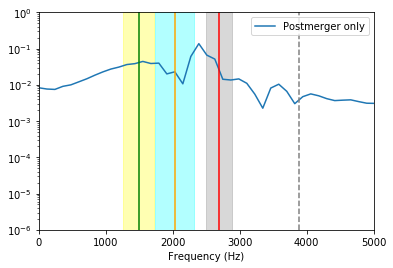

125H_118_155 2.73


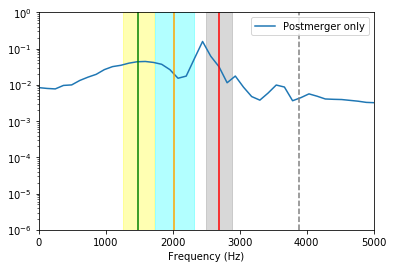

125H_117_156 2.73


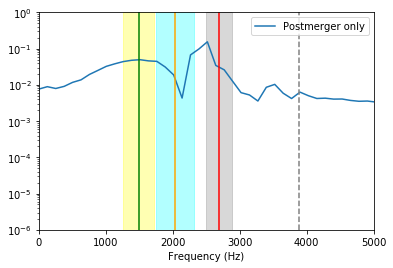

125H_116_158 2.74


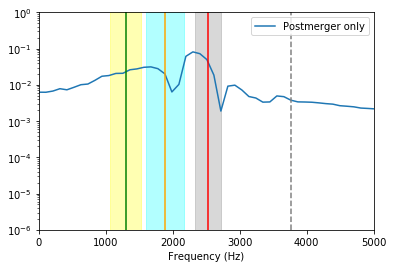

125H_112_140 2.52


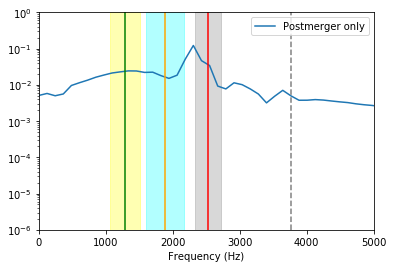

125H_107_146 2.5300000000000002


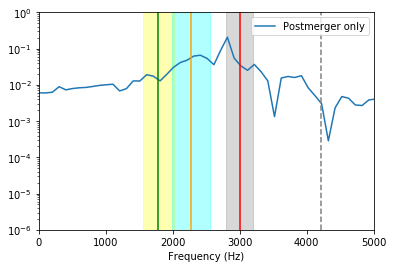

H_135_135 2.7


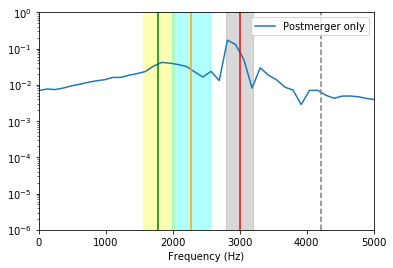

H_125_146 2.71


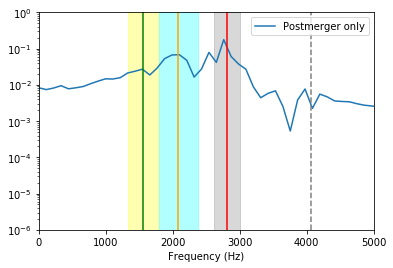

H_125_125 2.5


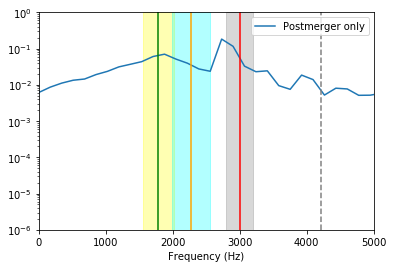

H_121_151 2.7199999999999998


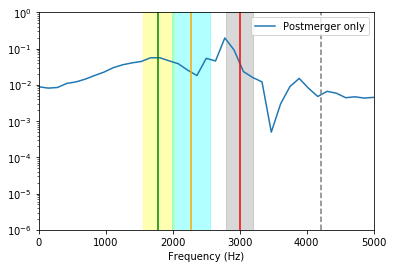

H_118_155 2.73


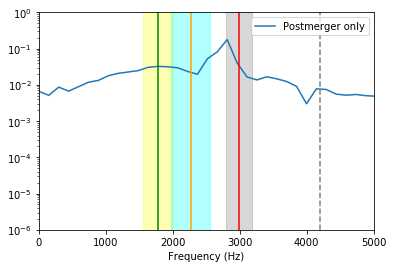

H_117_156 2.73


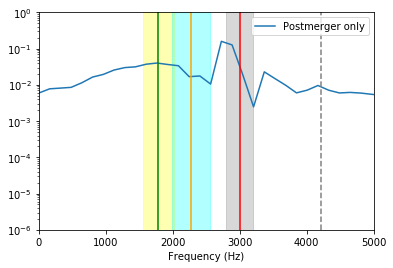

H_116_158 2.74


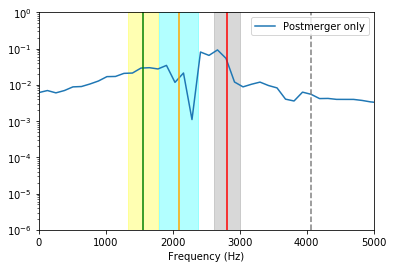

H_112_140 2.52


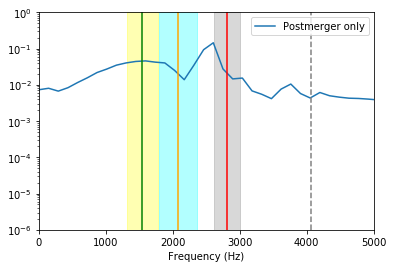

H_107_146 2.5300000000000002


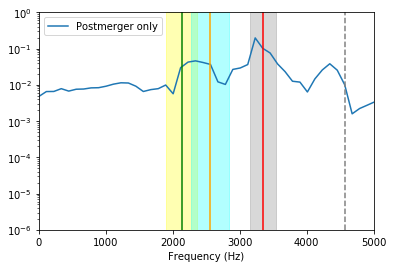

HB_135_135 2.7


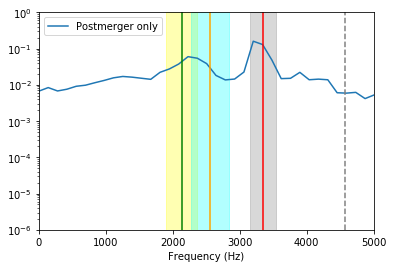

HB_125_146 2.71


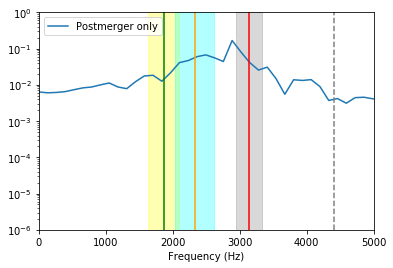

HB_125_125 2.5


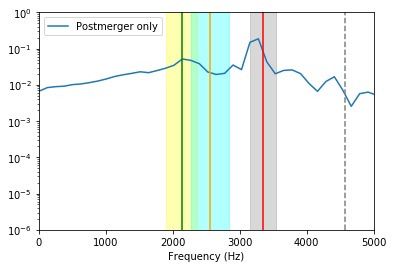

HB_121_151 2.7199999999999998


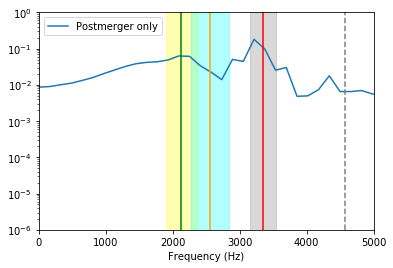

HB_118_155 2.73


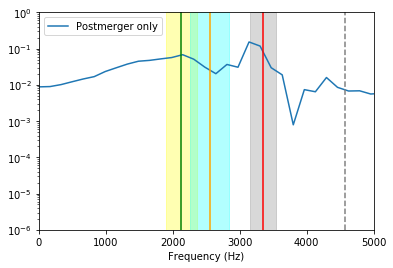

HB_117_156 2.73


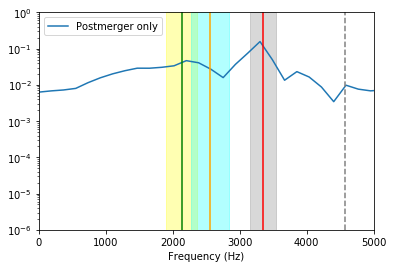

HB_116_158 2.74


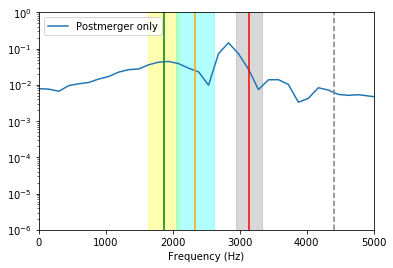

HB_112_140 2.52


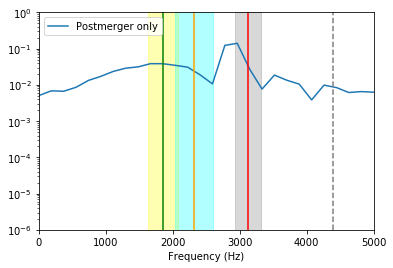

HB_107_146 2.5300000000000002


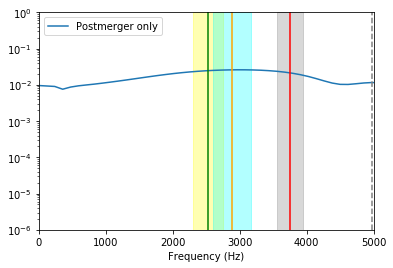

B_135_135 2.7


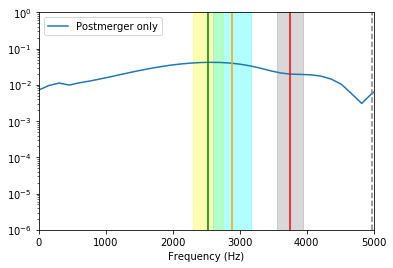

B_125_146 2.71


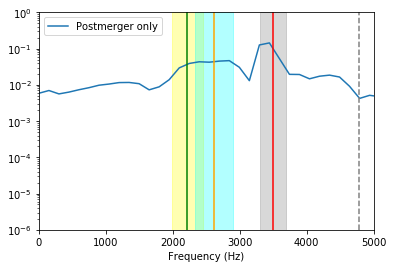

B_125_125 2.5


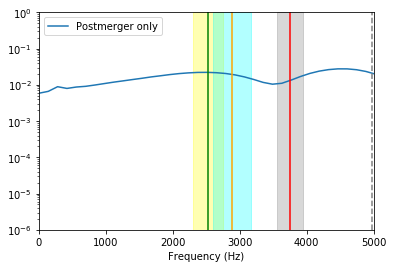

B_121_151 2.7199999999999998


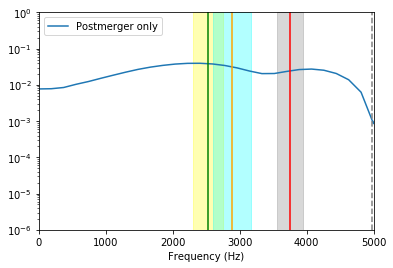

B_118_155 2.73


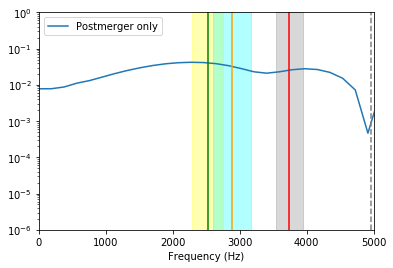

B_117_156 2.73


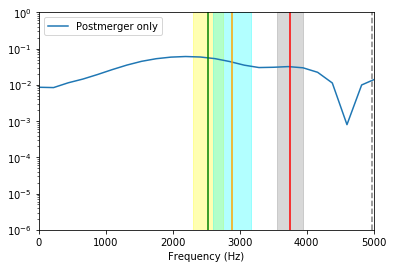

B_116_158 2.74


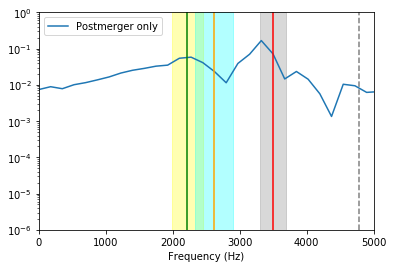

B_112_140 2.52


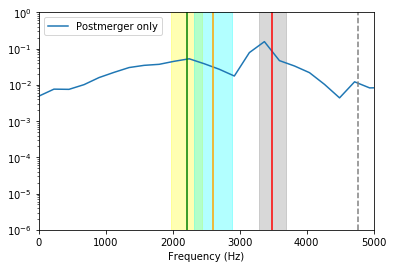

B_107_146 2.5300000000000002


In [19]:
for eos in EOS:
    
        if eos=='15H':
            nmb=1
        elif eos=='125H':
            nmb=2
        elif eos=='H':
            nmb=3
        elif eos=='HB':
            nmb=4
        elif eos=='B':
            nmb=5
        for mas in MASS:
                        
            f=open('data/'+eos+'_'+mas,'r')
            lines=f.readlines()
            result1=[]
            result2=[]
            for x in lines:
                for i in range(len(x.split(' '))):
                    if x.split(' ')[i]!='':
                        result1.append(x.split(' ')[i])
                        for j in range(i+1,len(x.split(' '))): 
                            if x.split(' ')[j]!='':
                                result2.append(x.split(' ')[j])
                                break
                        break
        
            time=np.zeros(len(result1))
            strain=np.zeros(len(result1))
            for i in range(len(result1)):
                time[i]=float(result1[i])
                strain[i]=float(result2[i])
            
            mas1=float(mas.split('_')[0])/100
            mas2=float(mas.split('_')[1])/100
            mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
            q=mas1/mas2
            Mc=pow(q/pow(1+q,2),3/5)*mastot
            
            
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            f_2=f20(Mc,r68[nmb-1,0])    
            f_s=fspir(Mc,r68[nmb-1,1])
            f_p=fpeak(Mc,r68[nmb-1,0])
            f_0=2*f_p-f_2
            
            #print(f_2_a,f_s_a,f_p_a)
            
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            
            #plt.subplot(212)
            
            plt.plot((freq2*Frequency),amp2)
            
            ax=plt.subplot()
            ax.axvline(x=(f_p*Mc)*1000,color='r',label='peak')
            ax.axvspan((f_p*Mc)*1000-196, (f_p*Mc)*1000+196, alpha=0.3, color='grey')
            ax.axvline(x=(f_2*Mc)*1000,color='g',label='2-0')
            ax.axvspan((f_2*Mc)*1000-229, (f_2*Mc)*1000+229, alpha=0.3, color='yellow')
            ax.axvline((f_s*Mc)*1000,color='orange',label='spiral') 
            ax.axvspan((f_s*Mc)*1000-286, (f_s*Mc)*1000+286, alpha=0.3, color='cyan')
            ax.axvline((f_0*Mc)*1000,linestyle="--",color='grey',label='2+0') 
            plt.yscale('log')
            plt.ylim(10**(-6),1)
            plt.xlim(0,5000)
            plt.xlabel('Frequency (Hz)')
            plt.legend(['Postmerger only'])
            
            #plt.subplot(222)
            #plt.plot(tim,post)
            #plt.title('Postmerger')
            #plt.subplot(221)
            #plt.plot(time,strain)
            #plt.title('Time Domain')
            plt.show()
            print(eos+'_'+mas,mastot)
    
        

Now use this to do the analysis for all the data

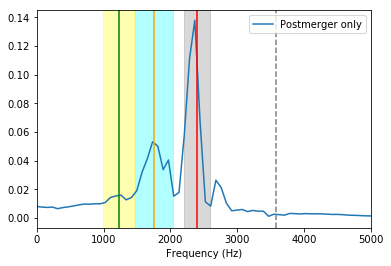

15H_135_135 2.7


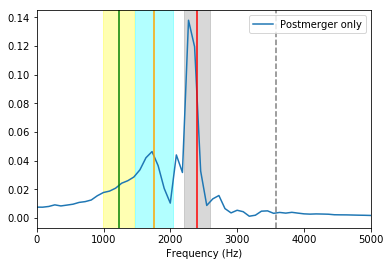

15H_125_146 2.71


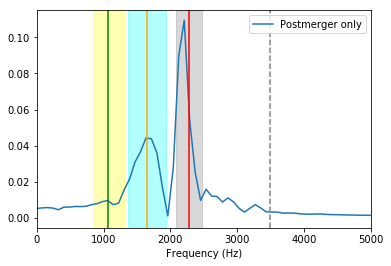

15H_125_125 2.5


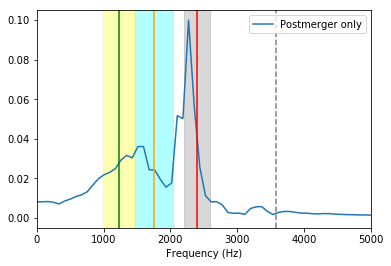

15H_121_151 2.7199999999999998


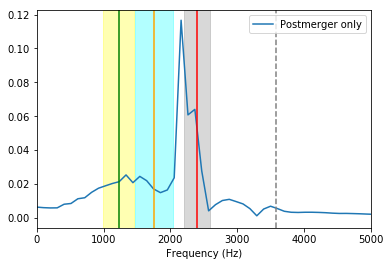

15H_118_155 2.73


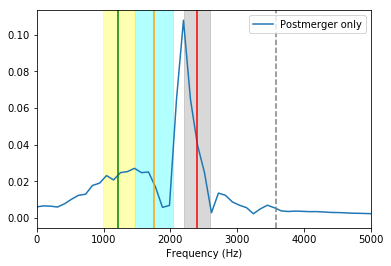

15H_117_156 2.73


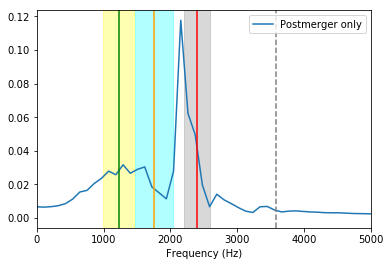

15H_116_158 2.74


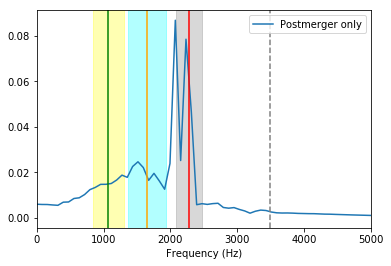

15H_112_140 2.52


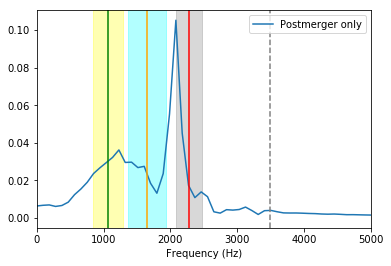

15H_107_146 2.5300000000000002


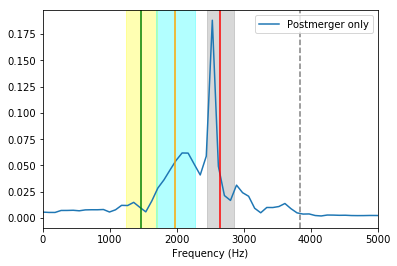

125H_135_135 2.7


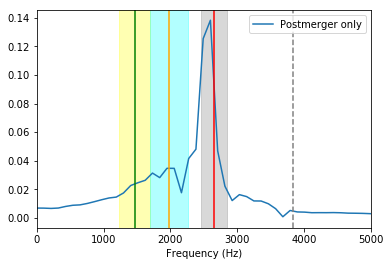

125H_125_146 2.71


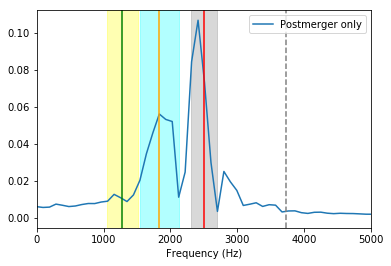

125H_125_125 2.5


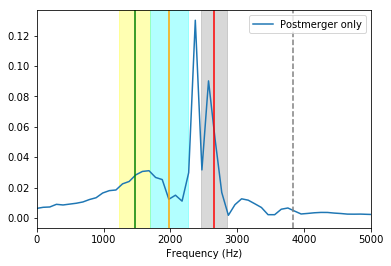

125H_121_151 2.7199999999999998


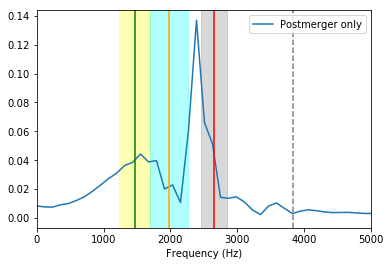

125H_118_155 2.73


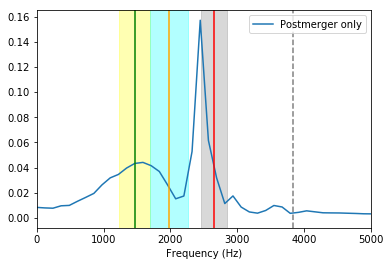

125H_117_156 2.73


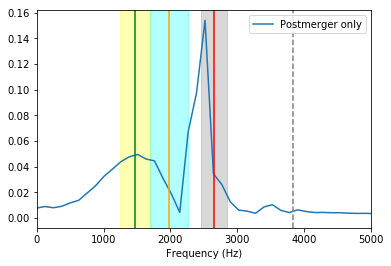

125H_116_158 2.74


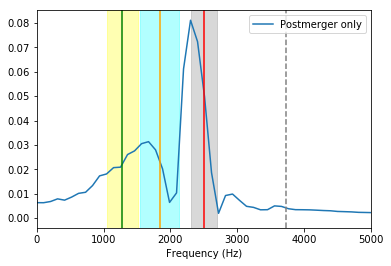

125H_112_140 2.52


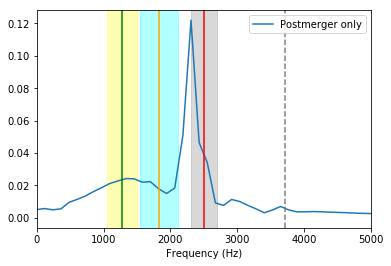

125H_107_146 2.5300000000000002


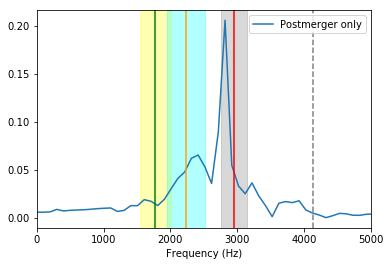

H_135_135 2.7


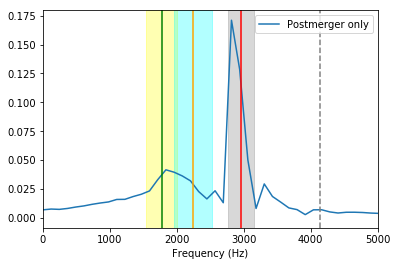

H_125_146 2.71


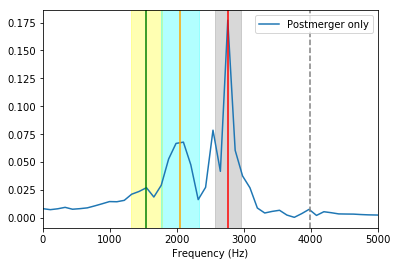

H_125_125 2.5


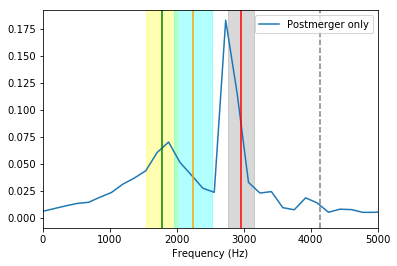

H_121_151 2.7199999999999998


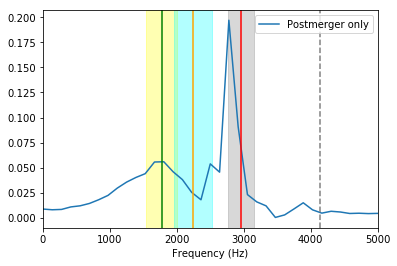

H_118_155 2.73


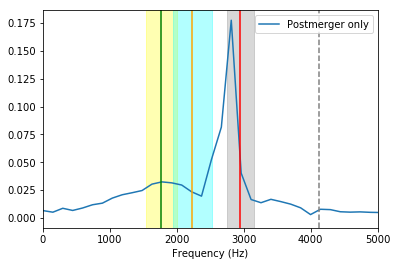

H_117_156 2.73


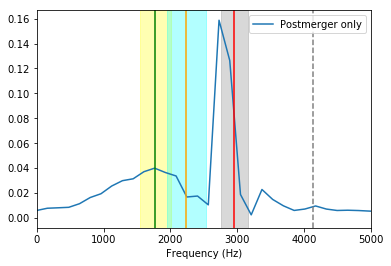

H_116_158 2.74


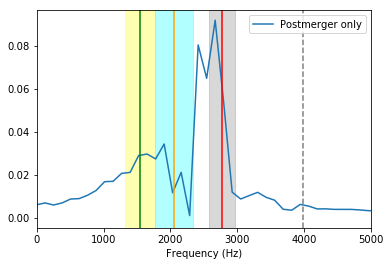

H_112_140 2.52


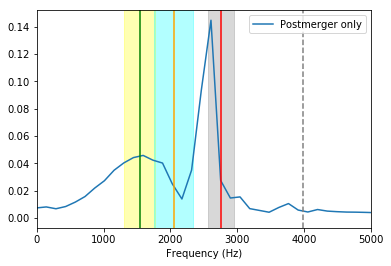

H_107_146 2.5300000000000002


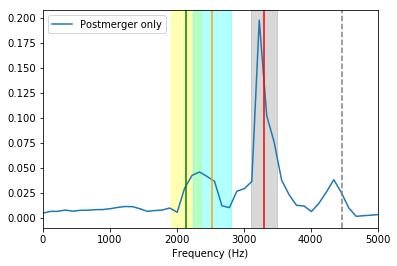

HB_135_135 2.7


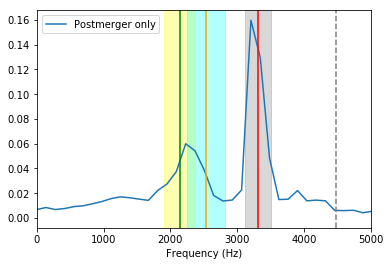

HB_125_146 2.71


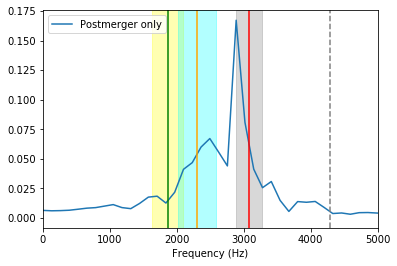

HB_125_125 2.5


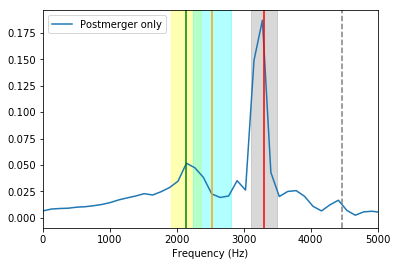

HB_121_151 2.7199999999999998


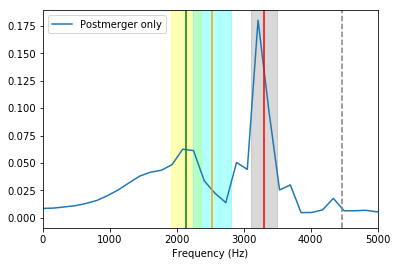

HB_118_155 2.73


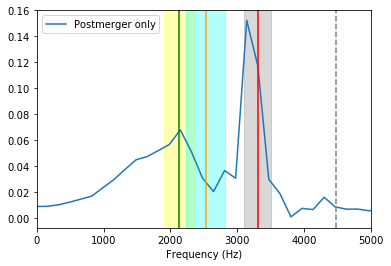

HB_117_156 2.73


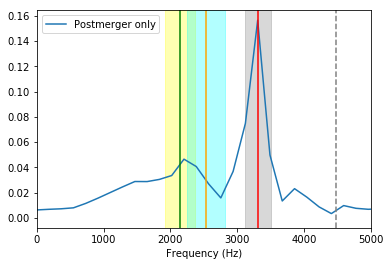

HB_116_158 2.74


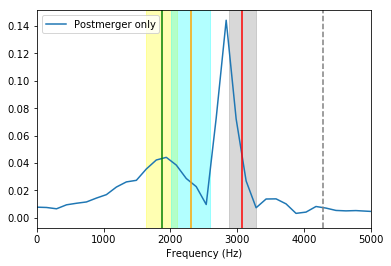

HB_112_140 2.52


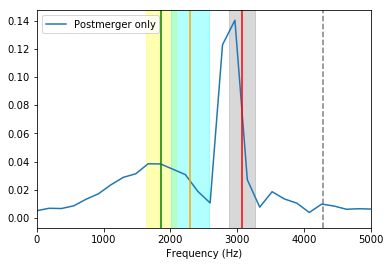

HB_107_146 2.5300000000000002


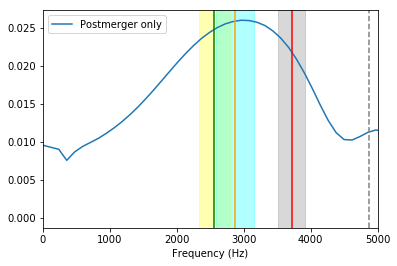

B_135_135 2.7


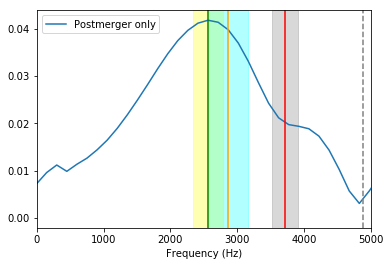

B_125_146 2.71


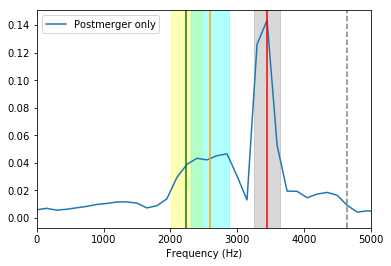

B_125_125 2.5


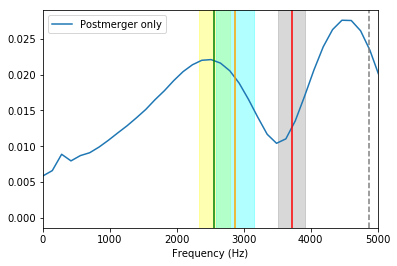

B_121_151 2.7199999999999998


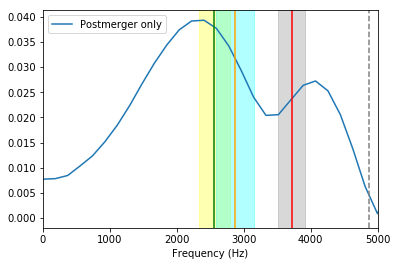

B_118_155 2.73


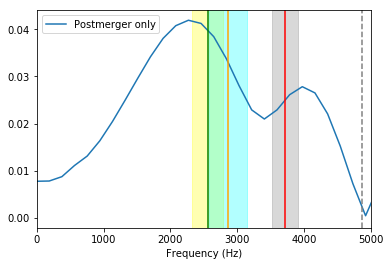

B_117_156 2.73


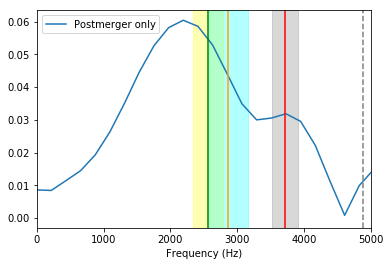

B_116_158 2.74


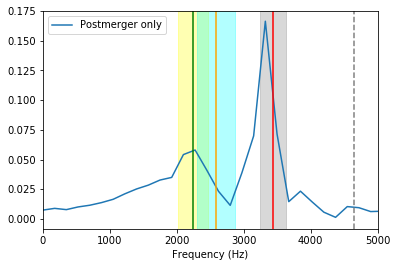

B_112_140 2.52


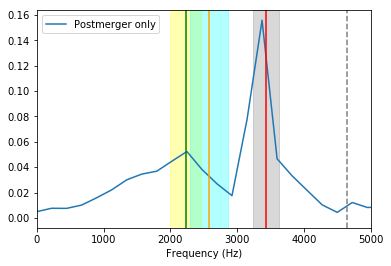

B_107_146 2.5300000000000002


In [20]:
for eos in EOS:
        if eos=='15H':
            nmb=1
        elif eos=='125H':
            nmb=2
        elif eos=='H':
            nmb=3
        elif eos=='HB':
            nmb=4
        elif eos=='B':
            nmb=5
        for mas in MASS:
                        
            f=open('data/'+eos+'_'+mas,'r')
            lines=f.readlines()
            result1=[]
            result2=[]
            for x in lines:
                for i in range(len(x.split(' '))):
                    if x.split(' ')[i]!='':
                        result1.append(x.split(' ')[i])
                        for j in range(i+1,len(x.split(' '))): 
                            if x.split(' ')[j]!='':
                                result2.append(x.split(' ')[j])
                                break
                        break
        
            time=np.zeros(len(result1))
            strain=np.zeros(len(result1))
            for i in range(len(result1)):
                time[i]=float(result1[i])
                strain[i]=float(result2[i])
            
            
            mas1=float(mas.split('_')[0])/100
            mas2=float(mas.split('_')[1])/100
            mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
            q=mas1/mas2
            Mc=pow(q/pow(1+q,2),3/5)*mastot
            
            
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            f_2_a=f20_a(Mc,r68[nmb-1,0])    
            f_s_a=fspir_a(Mc,r68[nmb-1,1])
            f_p_a=fpeak_a(Mc,r68[nmb-1,1])
            f_0_a=2*f_p_a-f_2_a
            #print(f_2_a,f_s_a,f_p_a)
            
            
            #plt.subplot(212)
            
            
            
            plt.plot((freq2*Frequency),amp2)
            
            ax=plt.subplot()
            ax.axvline(x=(f_p_a*Mc)*1000,color='r',label='peak')
            ax.axvspan((f_p_a*Mc)*1000-196, (f_p_a*Mc)*1000+196, alpha=0.3, color='grey')
            ax.axvline(x=(f_2_a*Mc)*1000,color='g',label='2-0')
            ax.axvspan((f_2_a*Mc)*1000-229, (f_2_a*Mc)*1000+229, alpha=0.3, color='yellow')
            ax.axvline((f_s_a*Mc)*1000,color='orange',label='spiral') 
            ax.axvspan((f_s_a*Mc)*1000-286, (f_s_a*Mc)*1000+286, alpha=0.3, color='cyan')
            ax.axvline((f_0_a*Mc)*1000,linestyle="--",color='grey',label='2+0') 
            plt.xlim(0,5000)
            plt.xlabel('Frequency (Hz)')
            plt.legend(['Postmerger only'])
            
            #plt.subplot(222)
            #plt.plot(tim,post)
            #plt.title('Postmerger')
            #plt.subplot(221)
            #plt.plot(time,strain)
            #plt.title('Time Domain')
            plt.show()
            print(eos+'_'+mas,mastot)
 
        

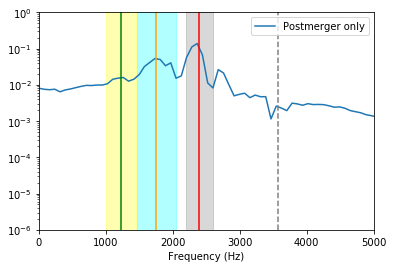

15H_135_135 2.7


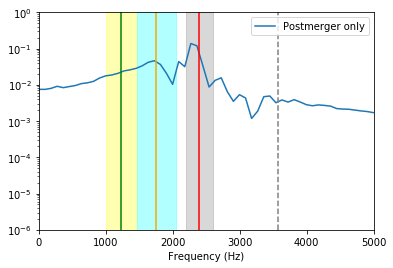

15H_125_146 2.71


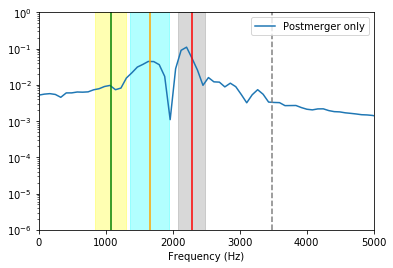

15H_125_125 2.5


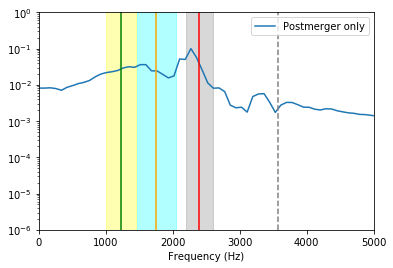

15H_121_151 2.7199999999999998


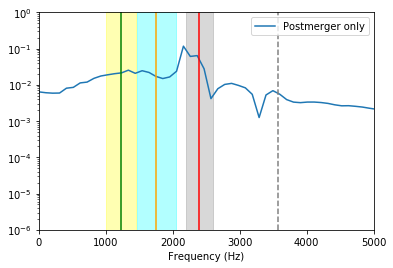

15H_118_155 2.73


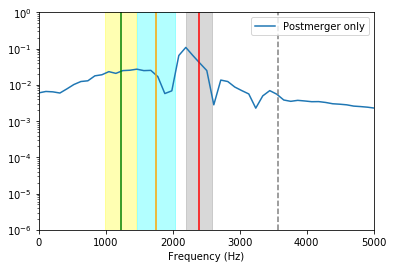

15H_117_156 2.73


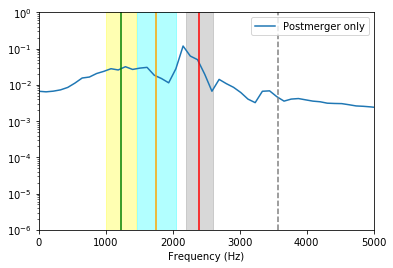

15H_116_158 2.74


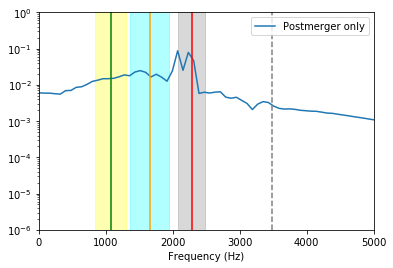

15H_112_140 2.52


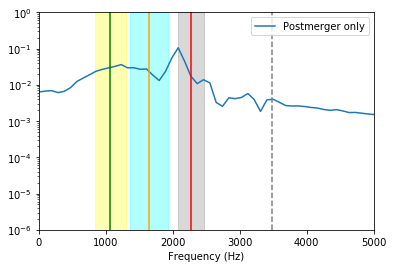

15H_107_146 2.5300000000000002


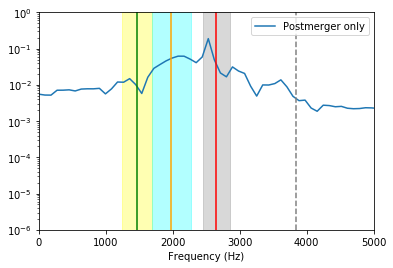

125H_135_135 2.7


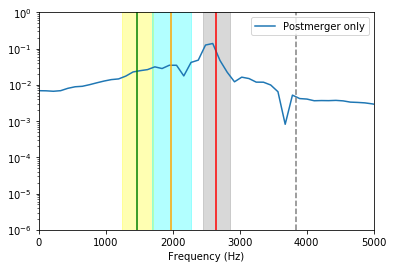

125H_125_146 2.71


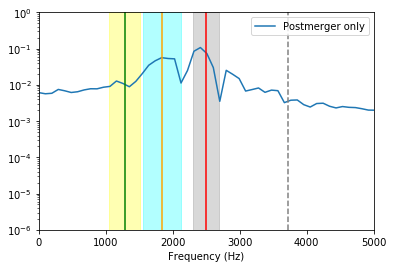

125H_125_125 2.5


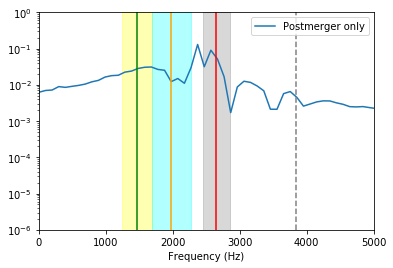

125H_121_151 2.7199999999999998


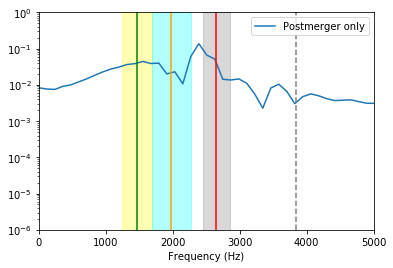

125H_118_155 2.73


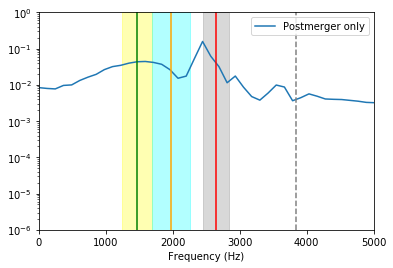

125H_117_156 2.73


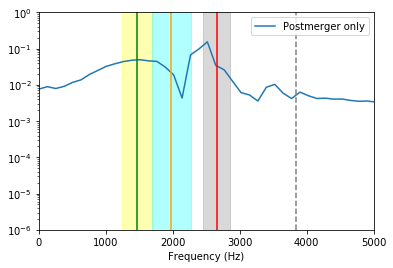

125H_116_158 2.74


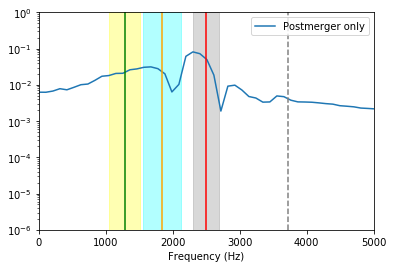

125H_112_140 2.52


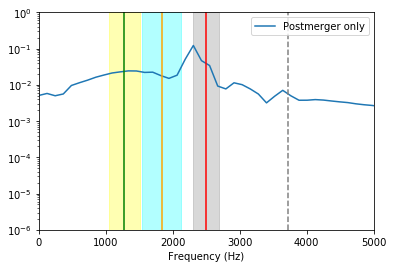

125H_107_146 2.5300000000000002


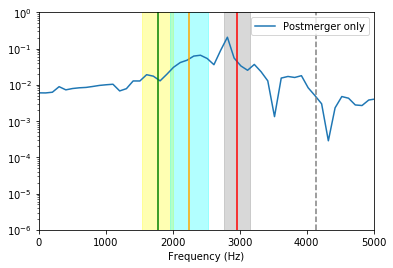

H_135_135 2.7


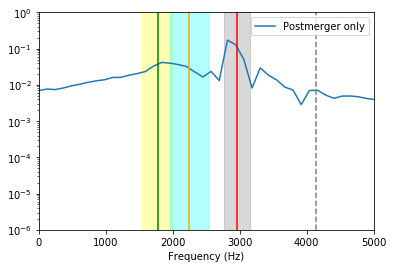

H_125_146 2.71


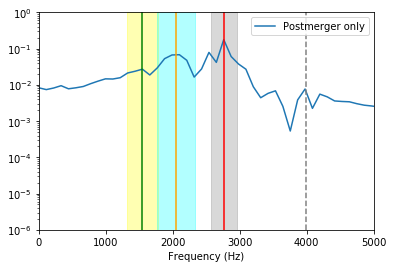

H_125_125 2.5


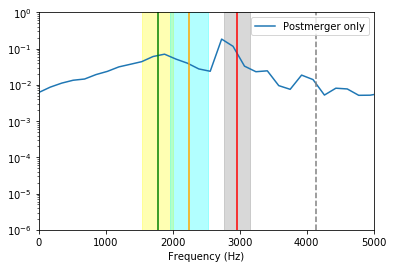

H_121_151 2.7199999999999998


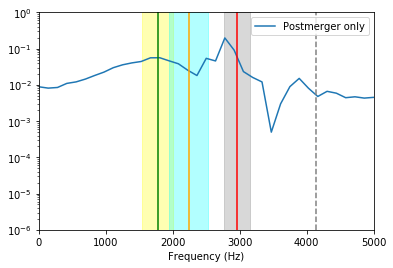

H_118_155 2.73


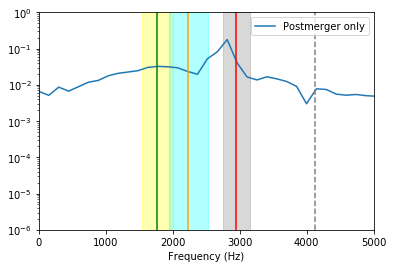

H_117_156 2.73


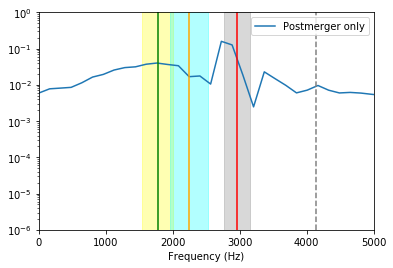

H_116_158 2.74


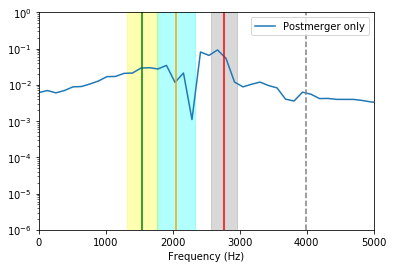

H_112_140 2.52


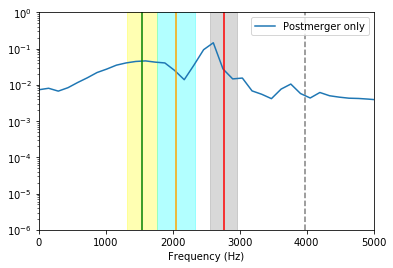

H_107_146 2.5300000000000002


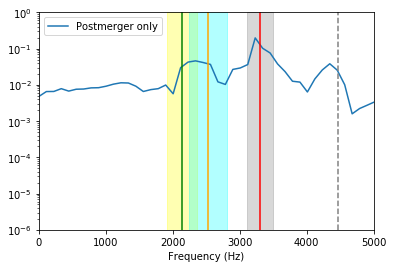

HB_135_135 2.7


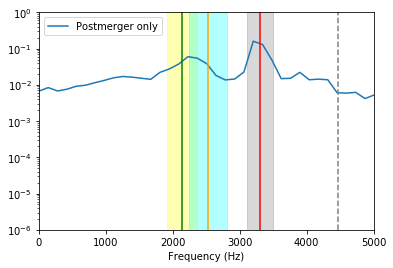

HB_125_146 2.71


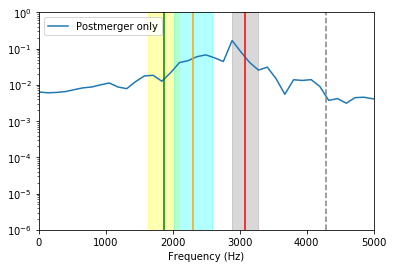

HB_125_125 2.5


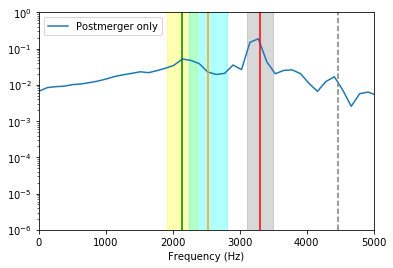

HB_121_151 2.7199999999999998


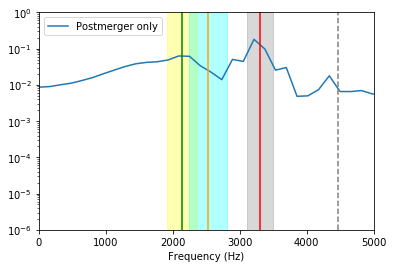

HB_118_155 2.73


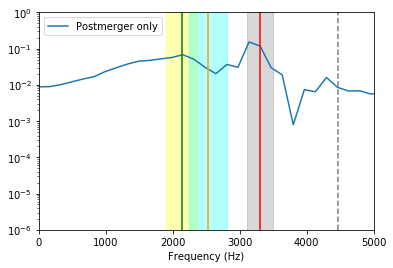

HB_117_156 2.73


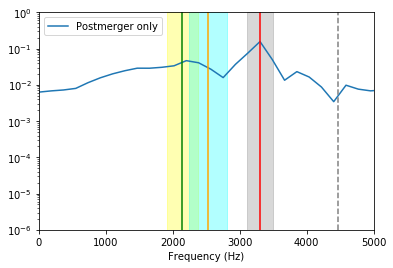

HB_116_158 2.74


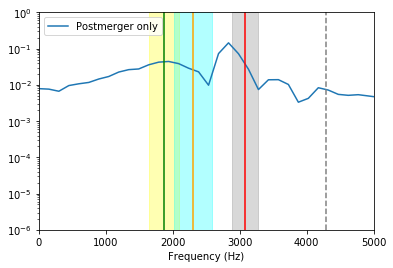

HB_112_140 2.52


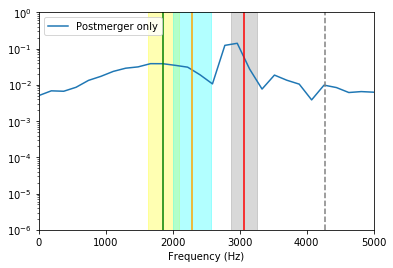

HB_107_146 2.5300000000000002


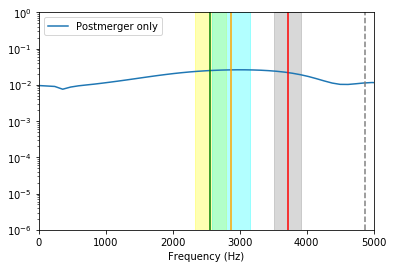

B_135_135 2.7


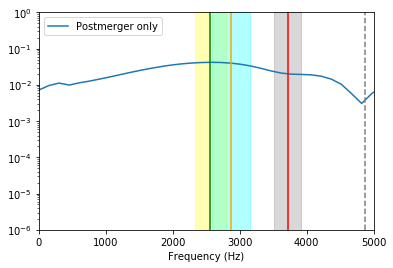

B_125_146 2.71


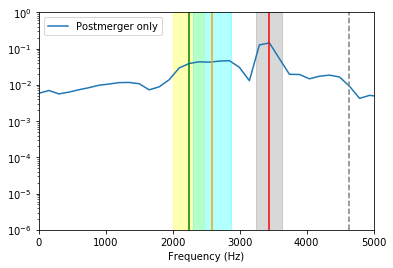

B_125_125 2.5


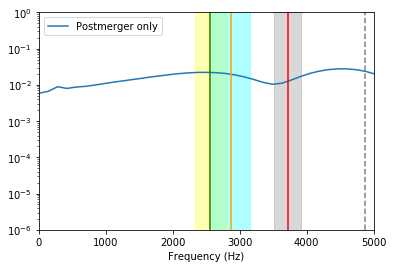

B_121_151 2.7199999999999998


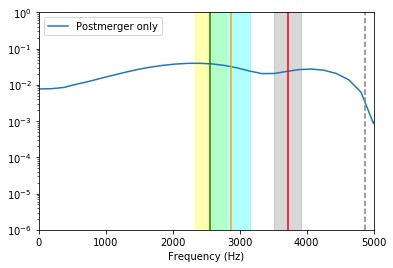

B_118_155 2.73


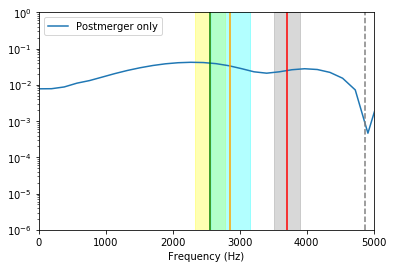

B_117_156 2.73


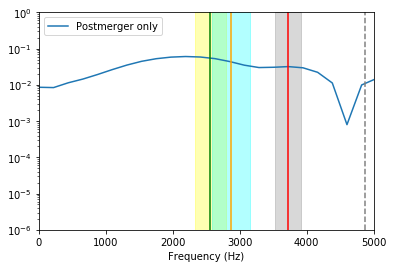

B_116_158 2.74


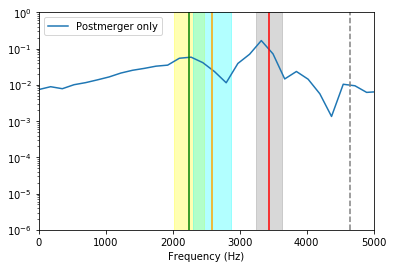

B_112_140 2.52


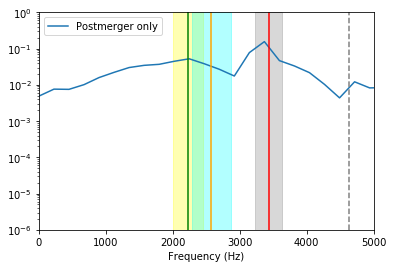

B_107_146 2.5300000000000002


In [21]:
for eos in EOS:
    
        if eos=='15H':
            nmb=1
        elif eos=='125H':
            nmb=2
        elif eos=='H':
            nmb=3
        elif eos=='HB':
            nmb=4
        elif eos=='B':
            nmb=5
        for mas in MASS:
                        
            f=open('data/'+eos+'_'+mas,'r')
            lines=f.readlines()
            result1=[]
            result2=[]
            for x in lines:
                for i in range(len(x.split(' '))):
                    if x.split(' ')[i]!='':
                        result1.append(x.split(' ')[i])
                        for j in range(i+1,len(x.split(' '))): 
                            if x.split(' ')[j]!='':
                                result2.append(x.split(' ')[j])
                                break
                        break
        
            time=np.zeros(len(result1))
            strain=np.zeros(len(result1))
            for i in range(len(result1)):
                time[i]=float(result1[i])
                strain[i]=float(result2[i])
            
            mas1=float(mas.split('_')[0])/100
            mas2=float(mas.split('_')[1])/100
            mastot=float(mas.split('_')[0])/100+float(mas.split('_')[1])/100
            q=mas1/mas2
            Mc=pow(q/pow(1+q,2),3/5)*mastot
            
            
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            f_2_a=f20_a(Mc,r68[nmb-1,0])    
            f_s_a=fspir_a(Mc,r68[nmb-1,1])
            f_p_a=fpeak_a(Mc,r68[nmb-1,1])
            f_0_a=2*f_p_a-f_2_a
            #print(f_2_a,f_s_a,f_p_a)
            
            freq2,amp2,tim,post=analyze(strain,time,mastot)
            
            #plt.subplot(212)
            
            plt.plot((freq2*Frequency),amp2)
            
            ax=plt.subplot()
            ax.axvline(x=(f_p_a*Mc)*1000,color='r',label='peak')
            ax.axvspan((f_p_a*Mc)*1000-196, (f_p_a*Mc)*1000+196, alpha=0.3, color='grey')
            ax.axvline(x=(f_2_a*Mc)*1000,color='g',label='2-0')
            ax.axvspan((f_2_a*Mc)*1000-229, (f_2_a*Mc)*1000+229, alpha=0.3, color='yellow')
            ax.axvline((f_s_a*Mc)*1000,color='orange',label='spiral') 
            ax.axvspan((f_s_a*Mc)*1000-286, (f_s_a*Mc)*1000+286, alpha=0.3, color='cyan')
            ax.axvline((f_0_a*Mc)*1000,linestyle="--",color='grey',label='2+0') 
            plt.yscale('log')
            plt.ylim(10**(-6),1)
            plt.xlim(0,5000)
            plt.xlabel('Frequency (Hz)')
            plt.legend(['Postmerger only'])
            
            #plt.subplot(222)
            #plt.plot(tim,post)
            #plt.title('Postmerger')
            #plt.subplot(221)
            #plt.plot(time,strain)
            #plt.title('Time Domain')
            plt.show()
            print(eos+'_'+mas,mastot)
    
        